Importaciones

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import matplotlib.pyplot as plt

Generación de datos de serie de tiempo sintética

In [5]:
np.random.seed(0)
n_samples = 200
t = np.arange(n_samples)
time_series = 0.1*t + np.random.randn(n_samples)

División de datos

In [6]:
train_size = int(len(time_series) * 0.8)
train_data = time_series[:train_size]
test_data = time_series[train_size:]

Visualización de la serie de tiempo

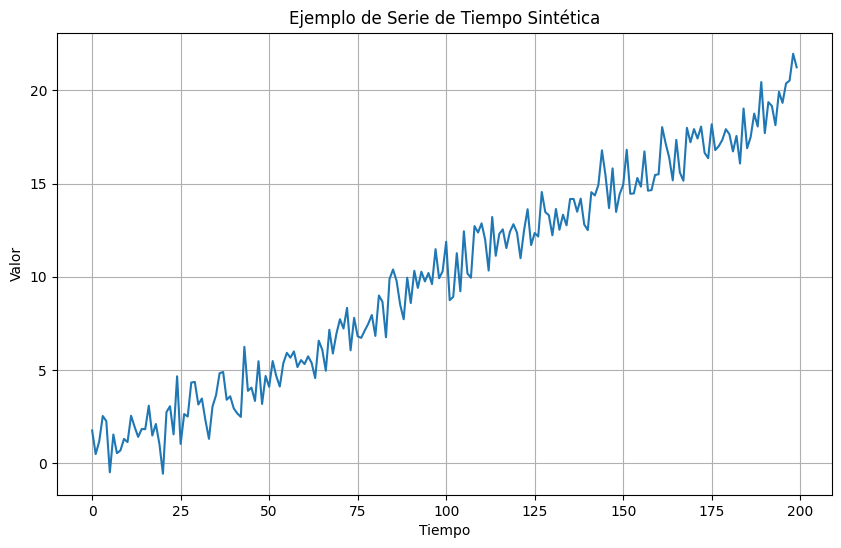

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(t, time_series, label='Serie de Tiempo')
plt.title('Ejemplo de Serie de Tiempo Sintética')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

Preparación de datos para LSTM

In [8]:
def create_dataset(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

seq_length = 16
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

Construcción del modelo LSTM

In [9]:
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(seq_length, 1), return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compilación del modelo

In [10]:
model.compile(optimizer='adam', loss='mse')

Entrenamiento del modelo

In [11]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 117.3326
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 98.2694
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 90.6358
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 78.5002
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 50.3506
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.9246
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.2288
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.9518
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.9543
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.6337
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.6542
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.3549
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0879
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.4509
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0665
Epoch 16/100

Evaluación del modelo

In [12]:
Evaluacion = model.evaluate(X_test, y_test)
print(f'Evaluación: {Evaluacion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step - loss: 3.8564
Evaluación: 3.856398820877075


Predicción

In [13]:
print("y_test:\n", y_test)
y_pred = model.predict(X_test)
print("y_pred:\n", y_pred)

y_test:
 [16.79659034 17.01045022 17.3444675  17.91747916 17.64600609 16.72504871
 17.5563816  16.07659685 19.02523145 16.89794234 17.49561666 18.75216508
 18.060437   20.4430146  17.70714309 19.36705087 19.16071718 18.1319065
 19.92327666 19.32845367 20.37179055 20.52350415 21.96323595 21.23652795]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
y_pred:
 [[16.72    ]
 [16.955921]
 [16.849112]
 [16.875484]
 [16.924244]
 [17.106833]
 [17.183607]
 [17.18889 ]
 [17.44209 ]
 [17.092981]
 [17.379215]
 [17.201725]
 [17.14716 ]
 [17.212702]
 [17.03712 ]
 [17.410583]
 [17.124174]
 [17.270555]
 [17.367493]
 [17.235882]
 [17.394106]
 [17.357878]
 [17.515623]
 [17.46905 ]]


Visualización de las predicciones

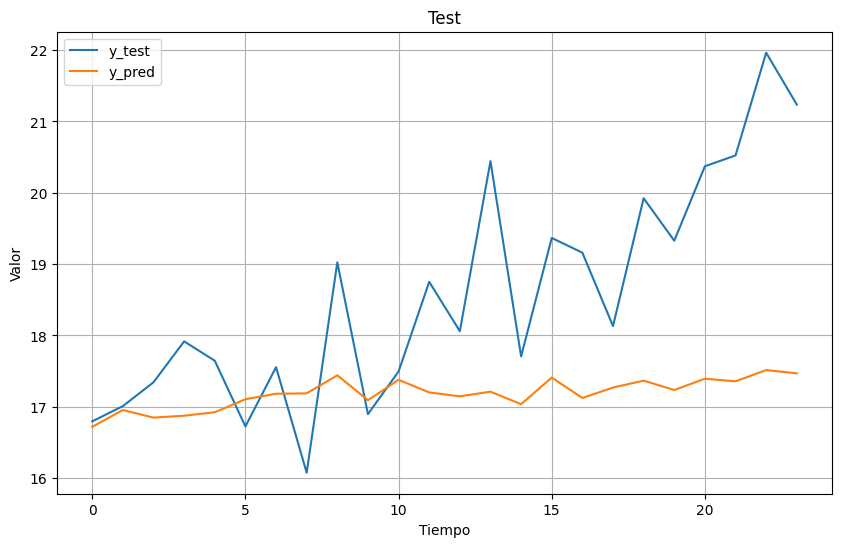

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.title('Test')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()